In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import BeautifulSoup as soup
import pandas as pd
import numpy as np
from scipy.stats import binom

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_human_evolution_fossils'
r = requests.get(url)
r.status_code

200

In [4]:
s = soup.BeautifulSoup(r.text)

In [8]:
tables = s.findAll('table')

In [26]:
str(tables[1])

'<table class="wikitable sortable">\n<tr style="background:#efefef;">\n<th></th>\n<th>Name</th>\n<th>Age</th>\n<th>Species</th>\n<th>Year<br />\ndiscovered</th>\n<th>Country</th>\n<th>Discovered by</th>\n<th>Now located at</th>\n</tr>\n<tr>\n<td><a href="/wiki/File:Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg" class="image"><img alt="Sahelanthropus tchadensis - TM 266-01-060-1.jpg" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg/100px-Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg" width="100" height="84" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg/150px-Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg/200px-Sahelanthropus_tchadensis_-_TM_266-01-060-1.jpg 2x" data-file-width="4239" data-file-height="3571" /></a></td>\n<td><a href="/wiki/Sahelanthropus" title="

In [99]:
dfs = pd.read_html(str(tables[1]))
df = dfs[0]
df.columns = df.iloc[0]
df = df[1:df.shape[0]]
for i in range(1, 7):
    dfs = pd.read_html(str(tables[i]))
    df2 = dfs[0]
    df2.columns = df2.iloc[0]
    df2 = df2[1:df2.shape[0]]
    df = df.append(df2)

In [100]:
def clean_year(x):
    """A fairly sloppy way of cleaning up this data"""
    return x
    x = str(x)
    i = x.find(', ')
    if i != -1:
        return int(x[i+2:len(x)])
    i = x.find('-')
    if i != -1:
        return int(x[0:i])
    return int(x)

df['Year discovered'] = df['Year discovered'].apply(clean_year)
df['c'] = 1

In [101]:
df.groupby(['Year discovered'])['c'].count()

Year discovered
1899         1
1903         1
1908         1
1909         2
1914         1
1920         1
1921         1
1929         2
1930         1
1931         2
1933         3
1938         1
1947         1
1960         2
1961         1
1963         1
1965         1
1965-1975    1
1967         3
1968         1
1973         1
1974         2
1975         1
1976         1
1978         1
1981         1
1982         1
1983         1
1984         1
1991         4
1992         1
1993         1
1994         2
1995         1
1997         3
1999         1
2000         3
2001         2
2003         1
2005         1
2013         1
2015         1
Name: c, dtype: int64

In [146]:
filter = df['Species']=='Homo sapiens'
humans = df[filter]

In [213]:
humans.shape

(41, 15)

In [147]:
humans.groupby(['Country'])['c'].count()

Country
Algeria                     1
Australia                   4
Brazil                      1
Chile                       1
Czech Republic              1
Egypt                       1
Ethiopia                    2
France                      3
Indonesia                   1
Israel                      4
Japan                       2
Mexico                      1
Minnesota, United States    1
Morocco                     4
Nigeria                     1
Romania                     1
South Africa                2
Sri Lanka                   1
Sudan                       1
UK                          5
United States               3
Name: c, dtype: int64

In [152]:
humans = humans.dropna(subset=['Age'])

In [153]:
def age_clean(x):
    x = str(x)
    i = x.find('[')
    if i != -1:
        x = x[0:i]
    x = x.replace('k', '')
    x = x.replace('~', '-')
    i = x.find('-')
    if i >= 0:
        arr = x.split('-')
        if arr[0]=='':
            return -1 * float(arr[1])
        return -1 * (float(arr[0]) + float(arr[1]))/2
    return -1 * float(x)

humans['Age'] = humans['Age'].apply(age_clean)

In [160]:
humans.sort('Age', inplace=True)
humans['Age']
bins = np.arange(-200, 10, 25)
h = np.histogram(humans['Age'], bins=bins)
h

(array([ 2,  4,  0,  0,  5,  0,  9, 21]),
 array([-200, -175, -150, -125, -100,  -75,  -50,  -25,    0]))

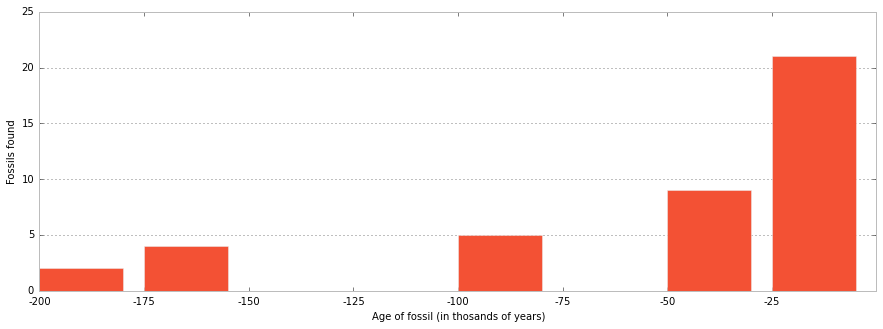

In [173]:
x = np.arange(len(h[0]))
plt.figure(figsize=(15,5))
plt.bar(x, h[0])
plt.xticks(x, bins[0:len(bins)-1])
plt.xlabel('Age of fossil (in thosands of years)')
plt.ylabel('Fossils found')
plt.gca().xaxis.grid(False)
plt.show()

In [191]:
# consider scaling based on https://en.wikipedia.org/wiki/World_population
humans['Population'] = 0.015 * 1000000
humans.loc[humans['Age'] >= -10, 'Population'] = 4 * 1000000
humans.loc[humans['Age'] >= -8, 'Population'] = 5 * 1000000
humans[['Population', 'Age']]
fossils_by_pop = pd.DataFrame(humans.groupby(['Population'])['c'].sum())

In [192]:
fossils_by_pop

,c
Population,
15000,32
4000000,6
5000000,3


,nan,nan,nan,Age,Country,Date discovered,Discovered by,Image,Name,Now Located at,Now located at,Species,Year discovered,c,Population
7,[56],[56],NaN,-190.00,Ethiopia,NaN,Richard Leakey,NaN,Omo 2,NaN,NaN,Homo sapiens,NaN,1,15000
6,[55],[55],NaN,-190.00,Ethiopia,NaN,Richard Leakey,NaN,Omo 1,NaN,NaN,Homo sapiens,1967,1,15000
12,NaN,NaN,NaN,-160.00,Morocco,NaN,NaN,NaN,Jebel Irhoud 4,NaN,NaN,Homo sapiens,1991,1,15000
11,[59],[59],NaN,-160.00,Morocco,NaN,NaN,NaN,Jebel Irhoud 3,NaN,NaN,Homo sapiens,1991,1,15000
9,[58],[58],NaN,-160.00,Morocco,NaN,NaN,NaN,Jebel Irhoud 1,NaN,NaN,Homo sapiens,1991,1,15000
10,NaN,NaN,NaN,-160.00,Morocco,NaN,NaN,NaN,Jebel Irhoud 2,NaN,NaN,Homo sapiens,1991,1,15000
22,NaN,NaN,NaN,-100.00,Israel,NaN,NaN,NaN,Skhul IX,NaN,NaN,Homo sapiens,NaN,1,15000
21,NaN,NaN,NaN,-100.00,Israel,NaN,"T. McCown and H. Moivus, Jr.",NaN,Skhul V,NaN,NaN,Homo sapiens,1933,1,15000
23,[70],[70],NaN,-100.00,South Africa,NaN,"Ray Inskeep, Robin Singer, John Wymer, Hilary ...",NaN,Klasies River Caves,NaN,NaN,Homo sapiens,1960,1,15000
17,NaN,NaN,NaN,-95.00,Israel,NaN,R. Neuville M Stekelis,NaN,Qafzeh 6[67],NaN,NaN,Homo sapiens,1930,1,15000


In [206]:
fossils_per_population_per_year_human = 32.0 / (15000 * (-10000 - -190000))
fossils_per_population_per_year_human

1.1851851851851851e-08

In [221]:
events = 100000/550
print events
rv = binom(events, .925)
pr_mvp = rv.pmf(150)
print pr_mvp

181
8.64756621207e-06


In [222]:
rv = binom((-10000 - -190000) * 500, fossils_per_population_per_year_human)
pr_unseen = rv.pmf(0)
print pr_unseen

0.34415378469


In [225]:
.999999*.2*pr_mvp*.05*pr_unseen

2.9760896641502296e-08

In [ ]:
Pr(x=0, n=189000 | p=fossils_per_population_per_year_human)

In [214]:
#Let's take median values in both cases and assume that 
#750 individuals have a 92.5 % chance of surviving 550 years.

prob_survivial = .925

discrete_evaluations = (-10000 - -190000) / 550
discrete_evaluations

rv = binom(discrete_evaluations, prob_survivial)
rv.pmf(discrete_evaluations)

8.4790384694028736e-12